# Nearest Neighbors Classifier
## Hyperparameter tuning with grid search and cross-validation

<img src="../images/knn.jpeg" width="900">

**Nearest Neighbors model** provides functionality for *unsupervised* and *supervised* neighbors-based learning methods. 
<br>
<br>
**Unsupervised** nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering.
<br>
<br>
**Supervised** neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.
<br>
<br>
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.
<br>
<br>
Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.).
<br>
<br>
Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.


## Import Python Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload

## Import Utility Classes

In [2]:
%autoreload 2
import sys
sys.path.append('..')

from utils.data_loader import DataLoader
from utils.term_counter_helper import TermFrequency, TfIdf
from utils.data_frame_helper import DataFrameHelper
from utils.model_evaluation_helper import ModelEvaluationHelper
from utils.classifier_helper import Classifier

## Load Data

In [3]:
loader = DataLoader()
content = loader.load_data("../Data/trainingdata.txt")

Number of Rows:  5485



In [4]:
label_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H"])
df = loader.get_data_frame(content, label_names)
df_helper = DataFrameHelper(df, label_names)

5485 documents
8 categories


## Input Dataset in DataFrame Format

In [5]:
df_helper.df.head()

,Labels,Text
0,A,champion products ch approves stock split cham...
1,B,computer terminal systems cpml completes sale ...
2,A,cobanco inc cbco year net shr cts vs dlrs net ...
3,A,am international inc am nd qtr jan oper shr lo...
4,A,brown forman inc bfd th qtr net shr one dlr vs...


## Vectorize Text data with TF-IDF Featurization

In [6]:
min_df = 2

tfidf = TfIdf(
    label_names,
    norm='l2',
    smooth_idf = True,
    sublinear_tf = False,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words='english',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=0.8, # 0.5, 0.75, 1.0
    min_df = min_df,
    max_features=None,
    vocabulary=None)



tfidf.vectorize_corpus(df_helper.raw_text)
tfidf.vectorizer

Feature Matrix:
n_samples: 5485 
n_features: 10416


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## Split Dataset into Trainset and Testset

In [7]:
tfidf_model_evaluation = ModelEvaluationHelper(
    tfidf.X, df_helper.y, test_size=0.3, random_state=3,
    label_names = df_helper.label_names,
    feature_names = tfidf.vectorizer.get_feature_names())

Number of observations in Train: 3839
Number of observations in Test : 1646


## Nearest Neighbors Classification

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
<br>
<br>
The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.
<br>
<br>
The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point.

**Available model parameters**
* weights:
    * *uniform, distance*
* metric:
    * *euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis*

## Hyperparameters Search Space

In [8]:
hyperparameters = {
    'n_neighbors': (2, 5),
    'weights': ("uniform", "distance"),
    'metric': ("cosine", "euclidean", "minkowski")
}

## KNN: Run Grid Search with Cross Validation

In [9]:
clf = Classifier()
knn = clf.multinomial_neighbors_clf("KNN")
tfidf_model_evaluation.set_hyperparam_grid(hyperparameters)
tfidf_model_evaluation.cross_val_grid_search(knn, "f1_weighted", cv = 5)


* Cross-Validation & Grid Search

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   17.2s



* Best Model Results

Best score: 0.914
Best parameters set:
	metric: 'euclidean'
	n_neighbors: 5
	weights: 'distance'

* Grid Search

Grid scores on training set:

0.853 (+/-0.023) for {'weights': 'uniform', 'metric': 'cosine', 'n_neighbors': 2}
0.877 (+/-0.035) for {'weights': 'distance', 'metric': 'cosine', 'n_neighbors': 2}
0.905 (+/-0.010) for {'weights': 'uniform', 'metric': 'cosine', 'n_neighbors': 5}
0.903 (+/-0.018) for {'weights': 'distance', 'metric': 'cosine', 'n_neighbors': 5}
0.853 (+/-0.023) for {'weights': 'uniform', 'metric': 'euclidean', 'n_neighbors': 2}
0.889 (+/-0.027) for {'weights': 'distance', 'metric': 'euclidean', 'n_neighbors': 2}
0.905 (+/-0.011) for {'weights': 'uniform', 'metric': 'euclidean', 'n_neighbors': 5}
0.914 (+/-0.010) for {'weights': 'distance', 'metric': 'euclidean', 'n_neighbors': 5}
0.853 (+/-0.023) for {'weights': 'uniform', 'metric': 'minkowski', 'n_neighbors': 2}
0.889 (+/-0.027) for {'weights': 'distance', 'metric': 'minkowski', 'n_neighb

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   20.9s finished


             precision    recall  f1-score   support

          A       0.90      0.98      0.94       826
          B       0.96      0.85      0.90       511
          C       0.77      0.89      0.82        63
          D       0.94      0.74      0.83        42
          E       0.86      0.60      0.71        10
          F       0.93      0.93      0.93        83
          G       0.85      0.79      0.82        57
          H       0.77      0.67      0.71        54

avg / total       0.91      0.91      0.91      1646




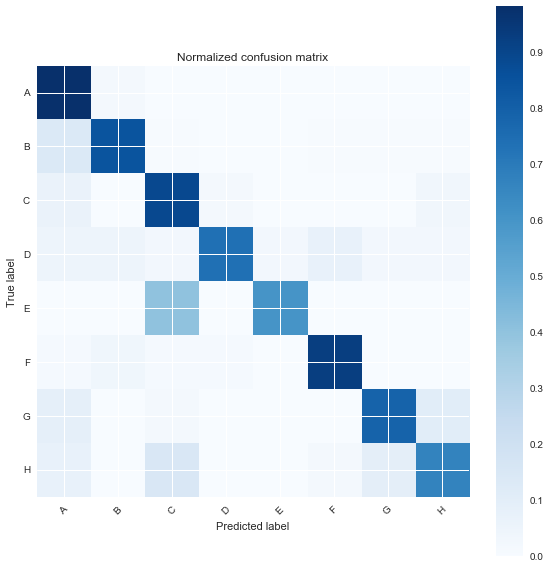

In [10]:
tfidf_model_evaluation.confusion_matrix()

## Nearest Centroid Classifier
The **NearestCentroid classifier** is a simple algorithm that represents each class by the centroid of its members. In effect, this makes it similar to the label updating phase of the sklearn.KMeans algorithm. It also has no parameters to choose, making it a good baseline classifier.
<br>
<br>
It does, however, suffer on non-convex classes, as well as when classes have drastically different variances, as equal variance in all dimensions is assumed. See **Linear Discriminant Analysis** and **Quadratic Discriminant Analysis** for more complex methods that do not make this assumption.
<br>
<br>
** Available model parameters**
* metric:
    * cityblock, cosine, euclidean, l1, l2, manhattan

In [11]:
hyperparameters = {
    'metric': ("cosine", "euclidean","l2")
}

In [12]:
NearestCentroid = clf.multinomial_neighbors_clf("NearestCentroid")
tfidf_model_evaluation.set_hyperparam_grid(hyperparameters)
tfidf_model_evaluation.cross_val_grid_search(NearestCentroid, "f1_weighted", cv = 5)


* Cross-Validation & Grid Search

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metri


* Best Model Results

Best score: 0.861
Best parameters set:
	metric: 'cosine'

* Grid Search

Grid scores on training set:

0.861 (+/-0.018) for {'metric': 'cosine'}
0.815 (+/-0.029) for {'metric': 'euclidean'}
0.815 (+/-0.029) for {'metric': 'l2'}


* Detailed classification report

The model is trained on the full train set with cross-validation.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          A       1.00      0.82      0.90       826
          B       0.79      0.96      0.87       511
          C       0.88      0.97      0.92        63
          D       0.89      0.81      0.85        42
          E       0.62      1.00      0.77        10
          F       0.88      0.99      0.93        83
          G       0.68      0.93      0.79        57
          H       0.78      0.72      0.75        54

avg / total       0.90      0.88      0.88      1646




/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished
/Users/marvin/anaconda2/envs/Notebook-env/lib/python3.5/site-packages/sklearn/neighbors/nearest_centroid.py:138: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


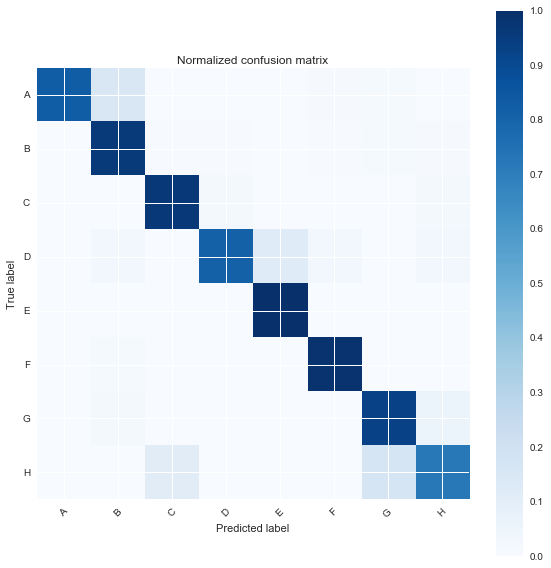

In [13]:
tfidf_model_evaluation.confusion_matrix()